In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf #connects plotly to pandas
#Makes plotly work in Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup  # Manipulate URL data
import json
from pandas import DataFrame as df

#### Grab Data from URL     

In [3]:
web_page = requests.get("https://www.worldometers.info/coronavirus/")
soup = BeautifulSoup(web_page.text, 'html.parser')
# print(soup.prettify())

#### Basic Covid Data 

In [4]:
covid_data = soup.find_all("div", class_ = "maincounter-number")
print("Coronavirus Cases: ", covid_data[0].text.strip())
print("Deaths: ", covid_data[1].text.strip())

print("Recovered: ", covid_data[2].text.strip())

data = soup.find_all("script", {"type":"text/javascript"})
# for content in data:
    # print(content)

Coronavirus Cases:  449,996,959
Deaths:  6,036,320
Recovered:  384,250,157


In [5]:
results = soup.find(id="main_table_countries_today")
content = results.find_all("td")
# content

In [6]:
clean_data = ""
# Use a different separator since the commas cause confusion
for data in content:
    clean_data += data.text.strip() + "|"
# Get rid of pluses
clean_data = clean_data.replace("+", "")
# Get rid of N/A
clean_data = clean_data.replace("N/A", "0")
# clean_data

In [7]:
import re

# List of countries in the website

countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]

for c in countries:
    pattern = c+"[,|\d]*"
    data = re.search(pattern, clean_data, re.IGNORECASE)
    if data is not None:
        print(data.group())

USA|81,012,955||987,615||55,215,670||24,809,670|5,421|242,363|2,955|960,060,830|2,872,172|334,262,970|
Spain|11,159,574||100,859||10,174,079||884,636|773|238,528|2,156|471,036,328|10,068,063|46,785,199|
Italy|13,109,527||156,201||11,941,805||1,011,521|592|217,360|2,590|190,499,871|3,158,548|60,312,476|
France|23,164,872||139,618||21,836,672||1,188,582|2,484|353,575|2,131|246,629,975|3,764,416|65,516,138|
Germany|16,144,363||125,299||12,753,700|228,700|3,265,364|2,494|191,661|1,488|104,701,826|1,242,988|84,233,966|
UK|19,307,014||162,359||18,086,708||1,057,947|268|281,916|2,371|487,512,832|7,118,532|68,485,019|
Turkey|14,425,638||95,811||13,882,425||447,402|975|168,007|1,116|146,830,957|1,710,057|85,863,211|
Iran|7,102,159||138,260||6,747,070||216,829|3,428|82,777|1,611|47,884,518|558,106|85,798,298|
Russia|17,081,394||357,601||14,802,351||1,921,442|2,300|116,964|2,449|273,400,000|1,872,095|146,039,580|
Brazil|29,144,964||652,936||27,344,949||1,147,079|8,318|135,497|3,036|63,776,166|296

#### Working with CSV Data

<AxesSubplot:xlabel='date'>

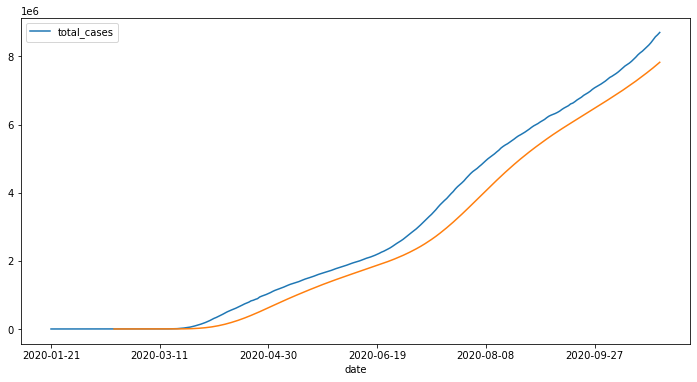

In [14]:
owid_df = pd.read_csv('owid-covid-data.csv')
owid_df.columns
country_df = owid_df.location.unique()
country_df.size

indexer = owid_df[owid_df['location']=='United States'].index
us_tc = owid_df.loc[indexer, 'date':'total_cases']
us_tc = us_tc.dropna()
us_tc.set_index('date', inplace = True)
us_tc.plot(figsize=(12, 6))
us_tc.rolling(window=30).mean()['total_cases'].plot()

#### Do Lockdowns Work?

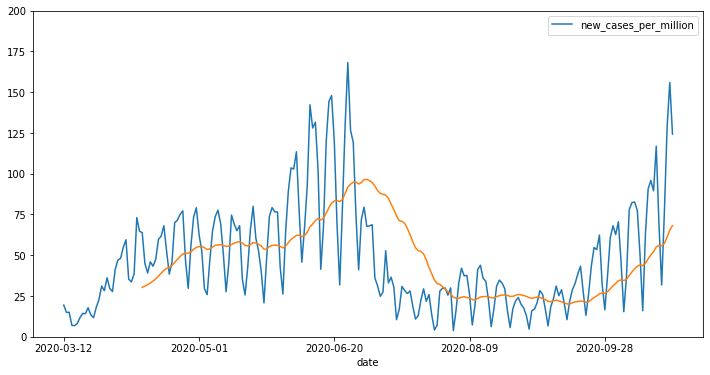

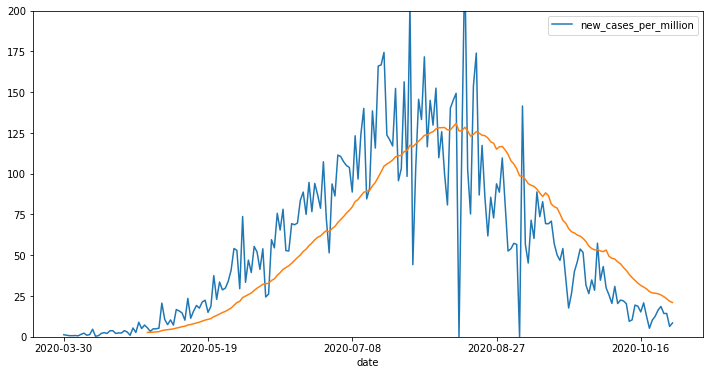

In [20]:
def plot_covid_data(country, col, plot_ma=False, y_max = 200):
    indexer = owid_df[owid_df['location']==country].index
    country_df = owid_df.loc[indexer, 'date':col]
    country_df = country_df.dropna()
    country_df.set_index('date', inplace = True)
    country_df.drop(country_df.columns.difference([col]), 1, inplace=True)
    country_df.plot(figsize=(12,6), ylim = [0, y_max])

    if plot_ma:
        country_df.rolling(window=30).mean()[col].plot()


plot_covid_data('Sweden', "new_cases_per_million", True)
plot_covid_data('Bolivia', "new_cases_per_million", True)
    


#### How does Median Age Effect Death Rate?

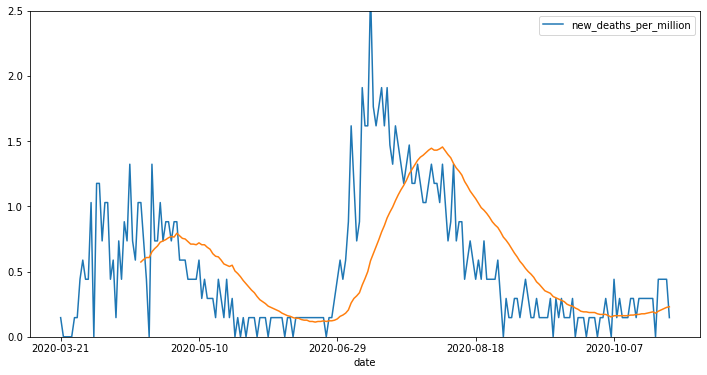

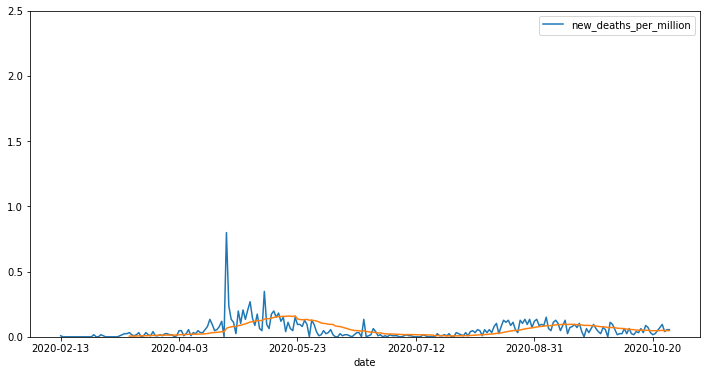

In [21]:

plot_covid_data('Serbia', "new_deaths_per_million", True, 2.5)
plot_covid_data('Japan', "new_deaths_per_million", True, 2.5)

#### How does Obesity Effect Death Rate?


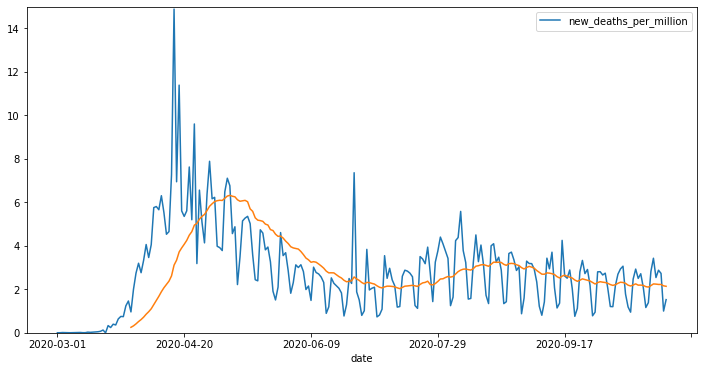

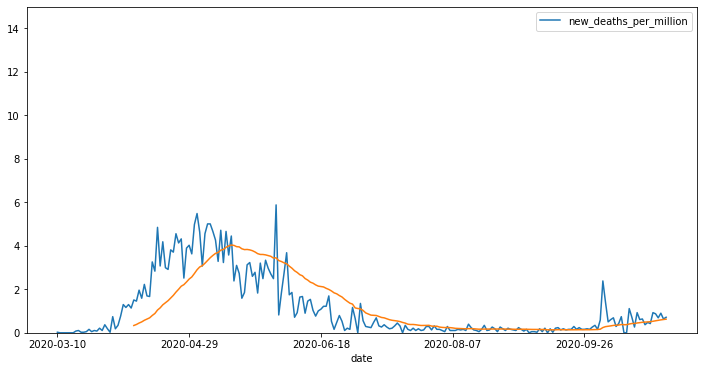

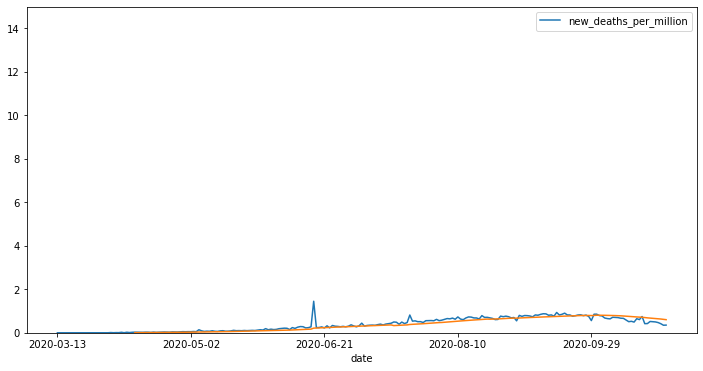

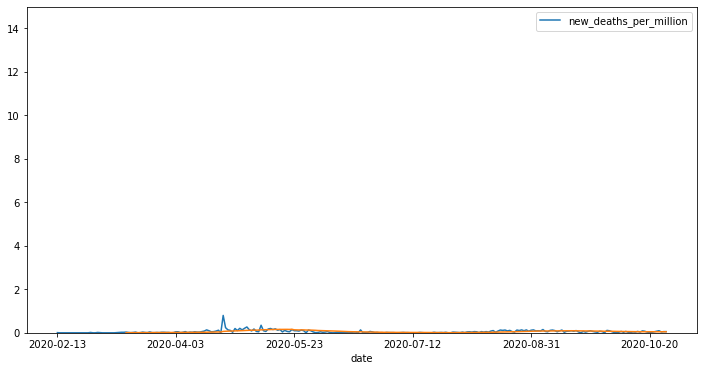

In [22]:

plot_covid_data('United States', "new_deaths_per_million", True, 15)
plot_covid_data('Canada', "new_deaths_per_million", True, 15)
plot_covid_data('India', "new_deaths_per_million", True, 15)
plot_covid_data('Japan', "new_deaths_per_million", True, 15)

#### How Does Diabetes Prevalence Effect Death?

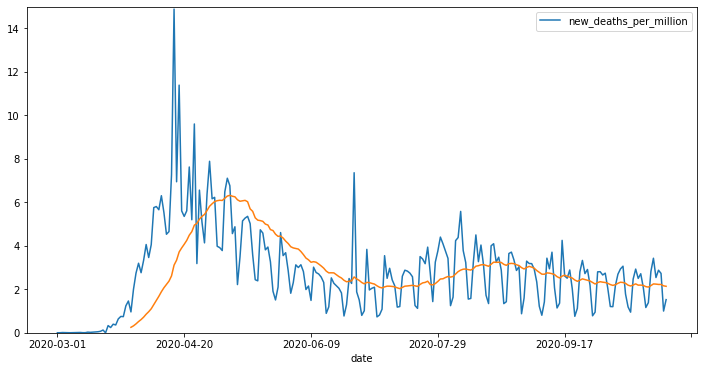

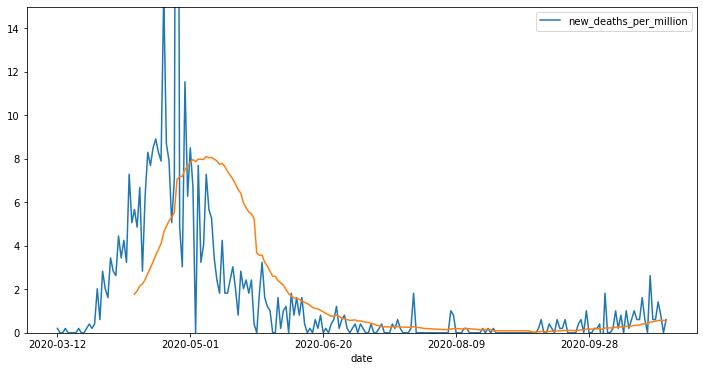

In [24]:

plot_covid_data('United States', "new_deaths_per_million", True, 15)
plot_covid_data('Ireland', "new_deaths_per_million", True, 15)

#### Does More Testing Slow Death rate?

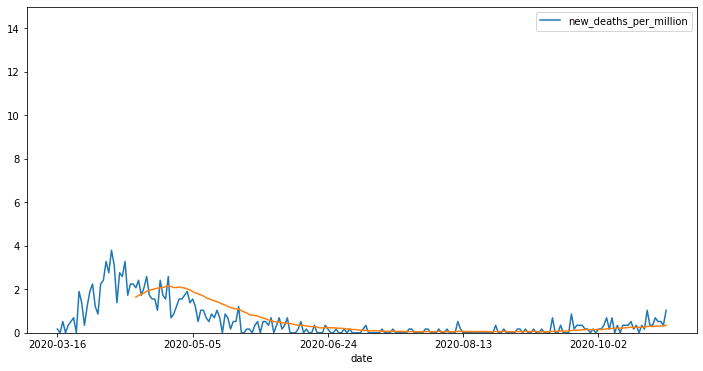

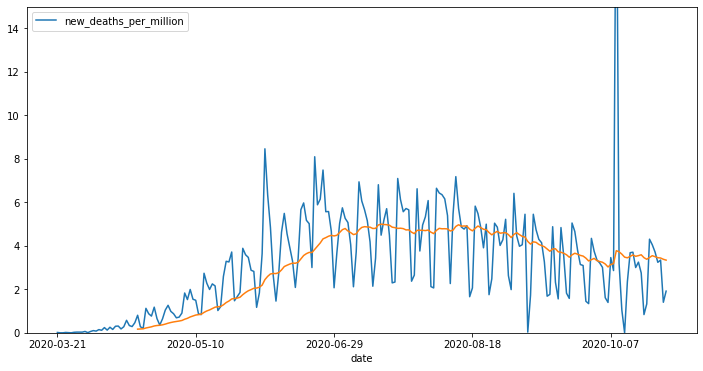

In [25]:
plot_covid_data('Denmark', "new_deaths_per_million", True, 15)
plot_covid_data('Mexico', "new_deaths_per_million", True, 15)

In [28]:
def scatter_plot(date, col1, col2):
    tot_df = pd.DataFrame(columns = ['date', 'location', col1, col2])
    for c in country_df:
        temp_df = owid_df[(owid_df['location']==c) &
            (owid_df['date']==date)][['date', 'location', col1, col2]]
        tot_df = tot_df.append(temp_df, ignore_index = True).fillna(0)
    tot_df.set_index('date', inplace = True)

    fig = px.scatter(data_frame=tot_df, x = col2, 
                    y = col1, color = 'location', trendline = 'ols', 
                    hover_data=["location"])
    fig.show()
    return tot_df

scatter_plot('2020-10-17', 'total_deaths_per_million', 'aged_70_older')

,location,total_deaths_per_million,aged_70_older
date,,,
2020-10-17,Aruba,299.721,7.452
2020-10-17,Afghanistan,38.147,1.337
2020-10-17,Angola,6.937,1.362
2020-10-17,Anguilla,0.000,0.000
2020-10-17,Albania,153.937,8.643
...,...,...,...
2020-10-17,South Africa,309.735,3.053
2020-10-17,Zambia,18.821,1.542
2020-10-17,Zimbabwe,15.542,1.882
